Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import string
import nltk
import ssl
import warnings
warnings.filterwarnings('ignore')

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

print("Downloading NLTK data...")
downloads = ['stopwords', 'punkt', 'punkt_tab', 'wordnet', 'omw-1.4', 'averaged_perceptron_tagger']
for item in downloads:
    try:
        nltk.download(item, quiet=False)
        print(f"{item} downloaded")
    except Exception as e:
        print(f"{item} failed: {e}")

print("\n" + "="*50)
print("Verifying downloads...")
print("="*50)

try:
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer
    print(f"Stopwords loaded: {len(stopwords.words('english'))} words")
    
    test = nltk.word_tokenize("test sentence")
    print(f"Tokenization working: {test}")
    
    lemmatizer = WordNetLemmatizer()
    print(f"Lemmatization working: {lemmatizer.lemmatize('running')}")
    
    print("\nAll NLTK components ready!")
except Exception as e:
    print(f"Error: {e}")
    print("\nTry running in terminal:")
    print("python -m nltk.downloader all")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hhskr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hhskr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hhskr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hhskr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hhskr\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hhskr\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


stopwords downloaded
punkt downloaded
punkt_tab downloaded
wordnet downloaded
omw-1.4 downloaded
averaged_perceptron_tagger downloaded

Verifying downloads...
Stopwords loaded: 198 words
Tokenization working: ['test', 'sentence']
Lemmatization working: running

All NLTK components ready!


Load Dataset

In [3]:
from pathlib import Path

BASE_DIR = Path.cwd().parent  
df = pd.read_csv(BASE_DIR / "data" / "fake_job_postings.csv")

print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (17880, 18)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


Basis info and Null checks

DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  obj

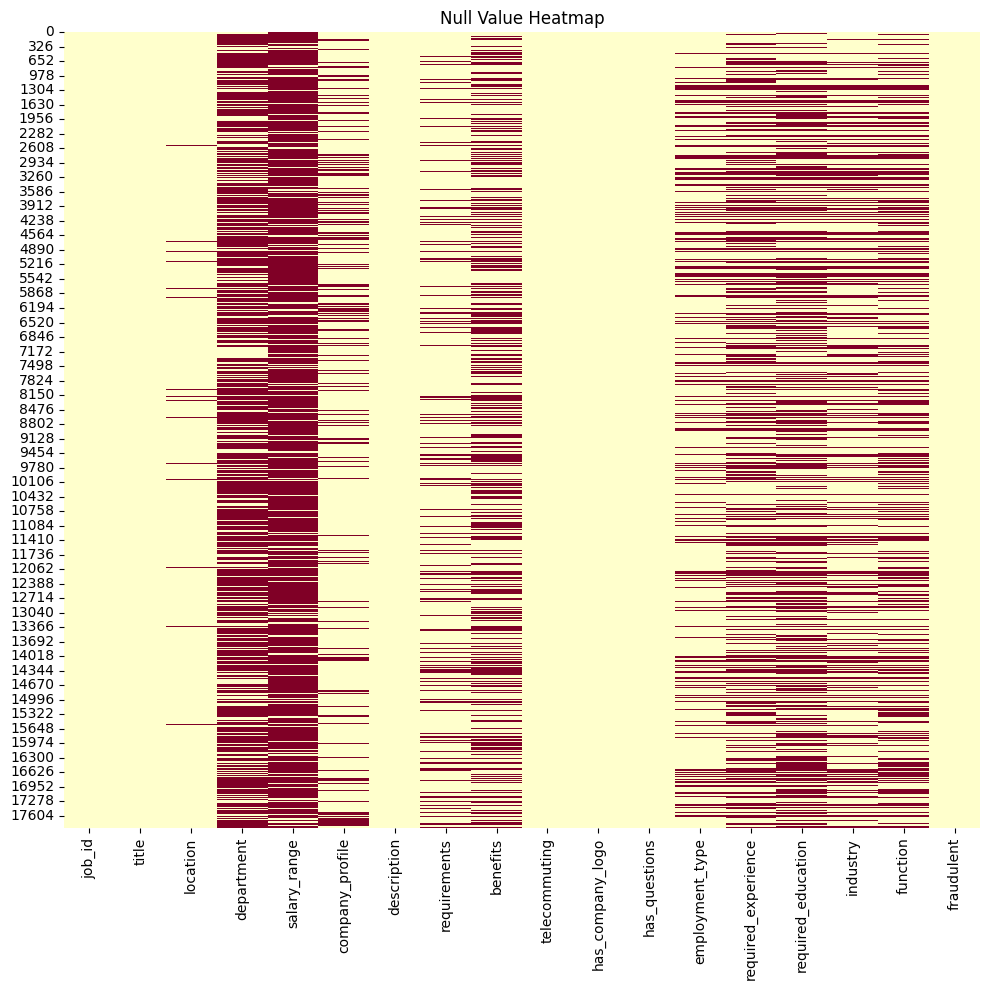

In [4]:
print("="*50)
print("DATASET INFO")
print("="*50)
df.info()
print("\n" + "="*50)
print("OBJECT COLUMNS DESCRIPTION")
print("="*50)
print(df.describe(include='object'))

plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(), cbar=False, cmap="YlOrRd")
plt.title("Null Value Heatmap")
plt.tight_layout()
plt.show()

In [5]:
df.drop(['location', 'salary_range', 'company_profile', 'telecommuting', 
         'has_company_logo', 'has_questions'], axis=1, inplace=True)
print(f"Columns after dropping: {df.columns.tolist()}")

Columns after dropping: ['job_id', 'title', 'department', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'fraudulent']


Target class Distribution

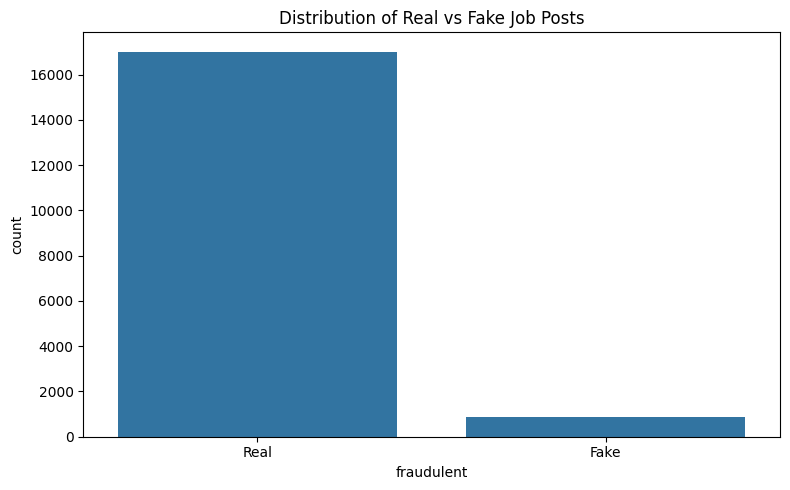


Class Distribution:
fraudulent
0    17014
1      866
Name: count, dtype: int64

Class Distribution (%):
fraudulent
0    95.1566
1     4.8434
Name: proportion, dtype: float64


In [6]:
plt.figure(figsize=(8,5))
sns.countplot(x='fraudulent', data=df)
plt.title("Distribution of Real vs Fake Job Posts")
plt.xticks([0,1], ['Real', 'Fake'])
plt.tight_layout()
plt.show()

print("\nClass Distribution:")
print(df['fraudulent'].value_counts())
print("\nClass Distribution (%):")
print(df['fraudulent'].value_counts(normalize=True) * 100)

Combine Text Columns for NLP

In [7]:
df['text'] = df['title'].fillna('') + ' ' + \
             df['department'].fillna('') + ' ' + \
             df['description'].fillna('') + ' ' + \
             df['requirements'].fillna('') + ' ' + \
             df['benefits'].fillna('')

df = df[['text', 'fraudulent']]
print(f"Combined text dataset shape: {df.shape}")
print(f"Sample text length: {len(df['text'].iloc[0])} characters")
df.head(2)

Combined text dataset shape: (17880, 2)
Sample text length: 1786 characters


,text,fraudulent
0,"Marketing Intern Marketing Food52, a fast-grow...",0
1,Customer Service - Cloud Video Production Succ...,0


Text cleaning Function

In [8]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """Clean and preprocess text data"""
    if not isinstance(text, str):
        return ""
    
    text = text.lower()
    
    text = re.sub(r'<.*?>', '', text)
    
    text = re.sub(r'http\S+|www\S+', '', text)
    
    text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)
    
    text = re.sub(r'\d+', '', text)
    
    text = re.sub(r'\s+', ' ', text).strip()
    
    try:
        words = nltk.word_tokenize(text)
        words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words and len(w) > 2]
        return ' '.join(words)
    except Exception as e:
        print(f"Error processing text: {e}")
        return text

test_text = "This is a <b>TEST</b> with numbers 123 and URL http://example.com"
print("Test input:", test_text)
print("Test output:", clean_text(test_text))

Test input: This is a <b>TEST</b> with numbers 123 and URL http://example.com
Test output: test number url


cleaning process

In [9]:
print("Cleaning text... This may take a few minutes.")
print(f"Processing {len(df)} job postings...")

df['clean_text'] = df['text'].apply(clean_text)

print("Cleaning complete!")
print(f"Average cleaned text length: {df['clean_text'].str.len().mean():.0f} characters")

print("\n" + "="*50)
print("SAMPLE CLEANED TEXTS")
print("="*50)
df[['clean_text', 'fraudulent']].sample(3)

Cleaning text... This may take a few minutes.
Processing 17880 job postings...
Cleaning complete!
Average cleaned text length: 1542 characters

SAMPLE CLEANED TEXTS


,clean_text,fraudulent
15437,user experience interaction designer tech effi...,0
45,inside sale professional omaha sale representa...,0
10832,software firmware expert tech software firmwar...,0


top words barchart

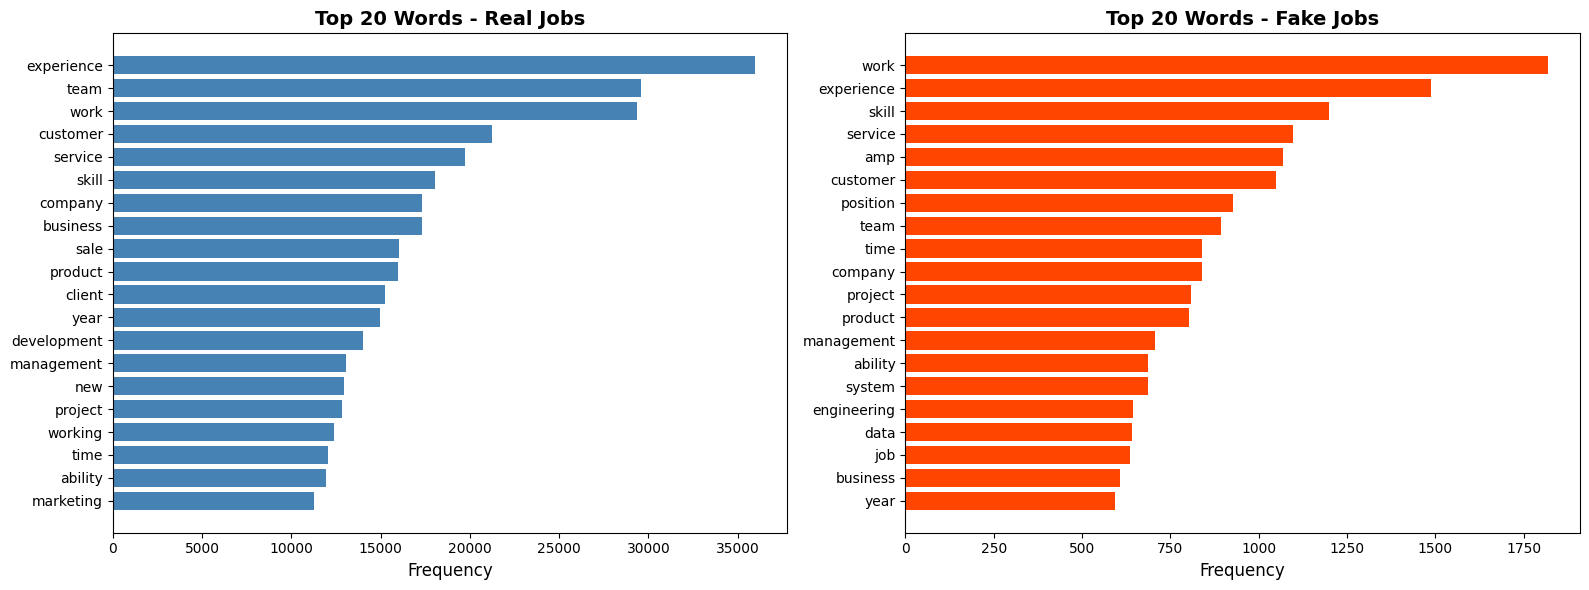


Top 10 Real Job Words:
      word  count
experience  35989
      team  29569
      work  29356
  customer  21228
   service  19709
     skill  18046
   company  17343
  business  17339
      sale  16029
   product  15974

Top 10 Fake Job Words:
      word  count
      work   1819
experience   1489
     skill   1199
   service   1097
       amp   1069
  customer   1050
  position    929
      team    895
      time    841
   company    841


In [10]:
from collections import Counter

def get_top_words(text_series, n=20):
    all_words = ' '.join(text_series).split()
    return Counter(all_words).most_common(n)

real_words = get_top_words(df[df['fraudulent'] == 0]['clean_text'])
real_df = pd.DataFrame(real_words, columns=['word', 'count'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.barh(real_df['word'], real_df['count'], color='steelblue')
ax1.set_xlabel('Frequency', fontsize=12)
ax1.set_title('Top 20 Words - Real Jobs', fontsize=14, fontweight='bold')
ax1.invert_yaxis()

fake_words = get_top_words(df[df['fraudulent'] == 1]['clean_text'])
fake_df = pd.DataFrame(fake_words, columns=['word', 'count'])

ax2.barh(fake_df['word'], fake_df['count'], color='orangered')
ax2.set_xlabel('Frequency', fontsize=12)
ax2.set_title('Top 20 Words - Fake Jobs', fontsize=14, fontweight='bold')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

print("\nTop 10 Real Job Words:")
print(real_df.head(10).to_string(index=False))
print("\nTop 10 Fake Job Words:")
print(fake_df.head(10).to_string(index=False))

saveing processed file

In [11]:

PROJECT_ROOT = Path.cwd().parent

OUTPUT_DIR = PROJECT_ROOT / "data"
output_path = OUTPUT_DIR / "cleaned_fake_job_postings.csv"

OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

df[['clean_text', 'fraudulent']].to_csv(output_path, index=False)

print("Cleaned data saved successfully!")
print(f"Location: {output_path}")
print(f"Shape: {df.shape}")
print(f"File size: {output_path.stat().st_size / 1024:.2f} KB")


Cleaned data saved successfully!
Location: d:\fake-job-detector-using-nlp\data\cleaned_fake_job_postings.csv
Shape: (17880, 3)
File size: 27071.62 KB
